# Задача бинарной классификации:
    1 - человек выжил
    0 - нет

In [1]:
import numpy as np 
import pandas as pd

%matplotlib inline 
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns

import string
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_frame = pd.read_csv('train.csv')
test_frame = pd.read_csv('test.csv')
print(train_frame.shape)
print(test_frame.shape)

(891, 12)
(418, 11)


In [3]:
train_frame.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_frame.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
train_frame.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#учтем категориальные признаки
train_frame.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Gilinski, Mr. Eliezer",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
#колличество пустых значений
train_null = train_frame.isnull().sum().sort_values(ascending=False)
train_null

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [8]:
null_test = test_frame.isnull().sum().sort_values(ascending=False)
null_test

Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

In [9]:
train_frame['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

## Приступим к визуализации данных

In [10]:
#рассмотрим отдельно женщин и мужчин и их возраст

male = train_frame[train_frame['Sex']=='male']
female = train_frame[train_frame['Sex']=='female']
male_survived = male[male['Survived']==1].Age.dropna()
male_not_survived = male[male['Survived']==0].Age.dropna()
female_survived = female[female['Survived']==1].Age.dropna()
female_not_survived = female[female['Survived']==0].Age.dropna()

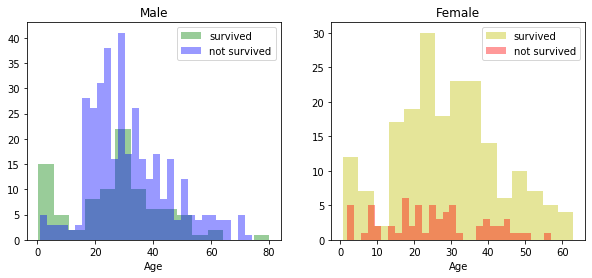

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))

ax = sns.distplot(male_survived, bins=15, label = 'survived', ax = axes[0], kde = False, color = 'g')
ax = sns.distplot(male_not_survived, bins=30, label = 'not survived', ax = axes[0], kde = False, color = 'b')
ax.legend()
ax.set_title('Male')

ax = sns.distplot(female_survived, bins=15, label = 'survived', ax = axes[1], kde = False, color = 'y')
ax = sns.distplot(female_not_survived, bins=30, label = 'not survived', ax = axes[1], kde = False, color = 'r')
ax.legend()
ax.set_title('Female')

plt.show()

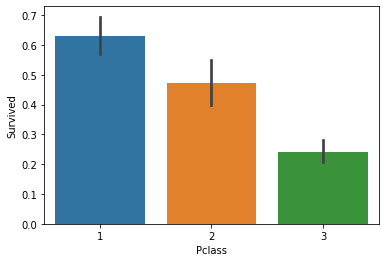

In [12]:
#рассмотрим гистограмму выживших пассажиров по классам

sns.barplot(x='Pclass', y='Survived', data=train_frame)

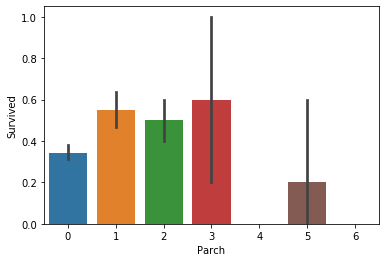

In [13]:
 sns.barplot(x='Parch', y='Survived', data=train_frame)

In [14]:
dft1 = train_frame.copy()
cat_cols = ['Sex', 'Embarked', 'Survived']

dft1[cat_cols]= dft1[cat_cols].astype('category')

In [15]:
cat_cols[:2]

['Sex', 'Embarked']

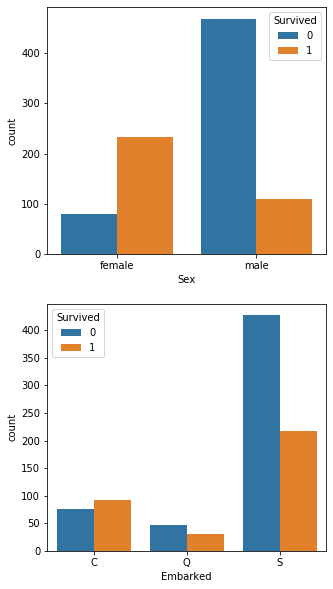

In [16]:
f,ax =plt.subplots(len(cat_cols[:2]),1,figsize=(5,10))
for idx,col in enumerate(cat_cols[:2]):
    if col!='Survived':
        sns.countplot(x=col,data=dft1[cat_cols],hue='Survived', ax=ax[idx])

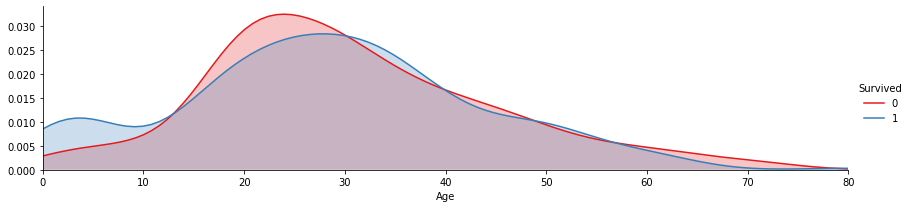

In [17]:
a = sns.FacetGrid(train_frame, hue = 'Survived', aspect=4, palette="Set1" )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , train_frame['Age'].max()))
a.add_legend()

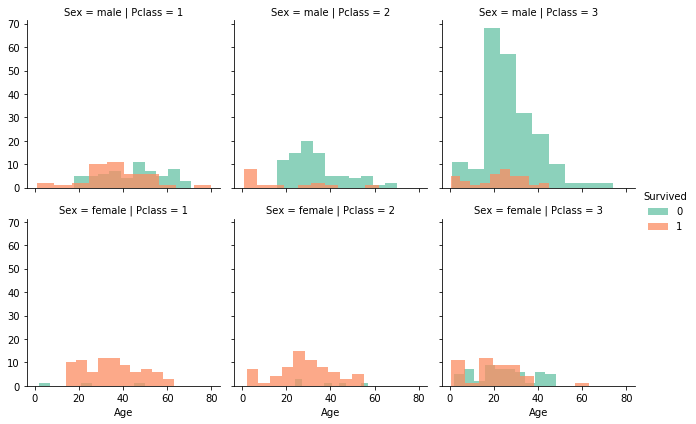

In [18]:
b = sns.FacetGrid(train_frame, row = 'Sex', col = 'Pclass', hue = 'Survived', palette="Set2")
b.map(plt.hist, 'Age', alpha = .75)
b.add_legend()

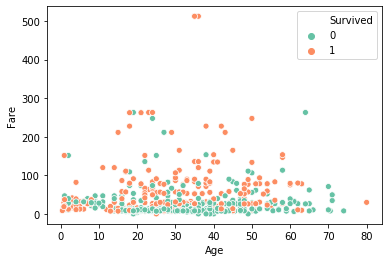

In [19]:
sns.scatterplot(x="Age", y="Fare",
                     hue="Survived", palette="Set2",
                     sizes=(20, 200), hue_norm=(0, 7),
                     legend="full", data=train_frame)


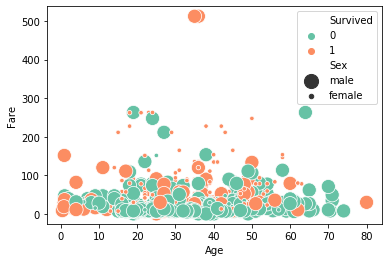

In [20]:
sns.scatterplot(x="Age", y="Fare", hue="Survived", size="Sex", palette="Set2",
                     sizes=(20, 200), hue_norm=(0, 7),
                     legend="full", data=train_frame)

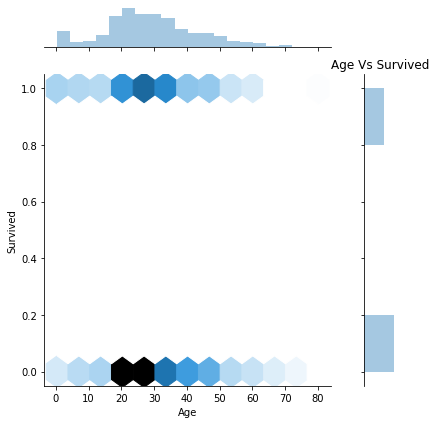

In [21]:
sns.jointplot(train_frame['Age'],train_frame['Survived'], kind="hex")
plt.title('Age Vs Survived')
plt.tight_layout()
plt.show()

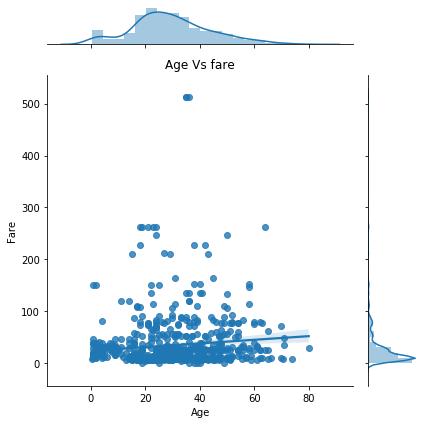

In [22]:
sns.jointplot(train_frame['Age'],train_frame['Fare'], kind="reg")
plt.title('Age Vs fare')
plt.tight_layout()
plt.show()

## Заполним пропущенные значения
### Есть разные способы заполнения пропусков
- случайными числами в отрезке среднего +/- стандартное отклонение
- используя KNN
- используя статистику

1. Заполним случайными числами

In [23]:
df_train1 = train_frame.copy()
df_test1 = test_frame.copy()

In [24]:
Age = [df_train1, df_test1]

for dataset in Age:
    mean = train_frame["Age"].mean()
    std = test_frame["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    #сгенерируем рандомные числа в отрезке +- среднего отклонения от среднего значения 
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    #заполним пропущенные значения 
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = df_train1["Age"].astype(int)
    
print(df_train1["Age"].isnull().sum())
print(df_test1["Age"].isnull().sum())

0
0


In [25]:
df_train1.isnull().sum().sort_values(ascending=False)


Cabin          687
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Age              0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

2. Imputations

Imputation - это процесс замены отсутствующих данных замененными значениями.
Imputations могут выполняться разными способами, как описано ниже:
• SimpleFill: заменяет отсутствующие записи средним или медианным значением каждого столбца.
• KNN: вмененные значения ближайшего соседа, взвешивающие выборки с использованием среднеквадратичной разницы для признаков, для которых в двух строках имеются наблюдаемые данные.
• SoftImpute: завершение матрицы с помощью итеративного мягкого определения порога разложений SVD. 
• IterativeSVD: завершение матрицы путем итеративной декомпозиции SVD низкого ранга.
• MICE: повторная реализация множественных замен связанными уравнениями.
• MatrixFactorization: прямая факторизация неполной матрицы в U и V низкого ранга, со штрафом L1 разреженности на элементах U и штрафом L2 на элементах V. Решается градиентным спуском.
• NuclearNormMinimization: простая реализация точного завершения матрицы с помощью выпуклой оптимизации Эммануэля Кандеса и Бенджамина Рехта с использованием cvxpy. Слишком медленно для больших матриц.
• BiScaler: итеративная оценка средних значений строк / столбцов и стандартных отклонений для получения дважды нормализованной матрицы. Не гарантируется сходимость, но на практике хорошо работает. Взято из завершения матрицы и SVD низкого ранга с помощью быстрых чередующихся наименьших квадратов.
В целях обучения будут использоваться 2 замены: Simple Impute и KNN, поскольку другие для этой задачи находятся вне контекста.

2.1 Simple Impute

In [26]:
series_age = train_frame['Age'].isnull()
df_age = pd.DataFrame(series_age)
df_age.columns = ["new"]
df_age.head()

,new
0,False
1,False
2,False
3,False
4,False


In [27]:
df_null = train_frame[df_age['new']==True]
df_notnull = train_frame[df_age['new']==False]

df_notnull.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
df_null.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [29]:
import datawig

imputer = datawig.SimpleImputer(
    input_columns = ['Sex','Pclass', 'Parch', 'Embarked', 'Survived'], output_column = 'Age',
    output_path = 'imputer_model')


In [30]:
imputer.fit(train_df=df_notnull, num_epochs=50)
imputed = imputer.predict(df_null)

imputed

2020-08-30 01:26:10,480 [INFO]  
========== start: fit model
2020-08-30 01:26:10,484 [WARNING]  Already bound, ignoring bind()
2020-08-30 01:26:10,758 [INFO]  Epoch[0] Batch [0-21]	Speed: 1567.07 samples/sec	cross-entropy=14.875870	Age-accuracy=0.000000
2020-08-30 01:26:10,951 [INFO]  Epoch[0] Train-cross-entropy=13.643495
2020-08-30 01:26:10,952 [INFO]  Epoch[0] Train-Age-accuracy=0.000000
2020-08-30 01:26:10,954 [INFO]  Epoch[0] Time cost=0.458
2020-08-30 01:26:10,967 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2020-08-30 01:26:11,021 [INFO]  Epoch[0] Validation-cross-entropy=14.558340
2020-08-30 01:26:11,022 [INFO]  Epoch[0] Validation-Age-accuracy=0.000000
2020-08-30 01:26:11,255 [INFO]  Epoch[1] Batch [0-21]	Speed: 1560.58 samples/sec	cross-entropy=13.445733	Age-accuracy=0.000000
2020-08-30 01:26:11,452 [INFO]  Epoch[1] Train-cross-entropy=12.620639
2020-08-30 01:26:11,453 [INFO]  Epoch[1] Train-Age-accuracy=0.000000
2020-08-30 01:26:11,454 [INFO]  Epoch[1] Time 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_imputed
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,27.241002
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,34.151113
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,23.444680
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,23.321171
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,27.069355
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,23.321171
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,21.251795
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,26.427861
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,26.427861


In [31]:
imputed["Age_imputed"].isnull().sum()

0

In [32]:
del imputed['Age']
imputed = imputed.rename(columns={'Age_imputed' : 'Age'})
imputed.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age
5,6,0,3,"Moran, Mr. James",male,0,0,330877,8.4583,NaN,Q,27.241002
17,18,1,2,"Williams, Mr. Charles Eugene",male,0,0,244373,13.0000,NaN,S,34.151113
19,20,1,3,"Masselmani, Mrs. Fatima",female,0,0,2649,7.2250,NaN,C,23.444680
26,27,0,3,"Emir, Mr. Farred Chehab",male,0,0,2631,7.2250,NaN,C,23.321171
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,0,0,330959,7.8792,NaN,Q,27.069355


In [33]:
df_imputed = imputed.append(df_notnull)
df_imputed.sort_values(by=['PassengerId'])

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.000000,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38.000000,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26.000000,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35.000000,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35.000000,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.000000,NaN,S,13.0000,"Montvila, Rev. Juozas",0,887,2,male,0,0,211536
887,19.000000,B42,S,30.0000,"Graham, Miss. Margaret Edith",0,888,1,female,0,1,112053
888,21.251795,NaN,S,23.4500,"Johnston, Miss. Catherine Helen ""Carrie""",2,889,3,female,1,0,W./C. 6607
889,26.000000,C148,C,30.0000,"Behr, Mr. Karl Howell",0,890,1,male,0,1,111369


2.2 Заполним пропуски с помощью kNN (классифицирует на k классов и заплотняет пропущенные значения ближайшими

In [34]:
from fancyimpute  import KNN 

cols = ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age'] #числовые данные
df_t1 = train_frame.copy()
df_te1 = test_frame.copy()


In [35]:
df1 = pd.DataFrame(KNN(k=5).fit_transform(df_t1[cols]) )
df1.head()

Imputing row 1/891 with 0 missing, elapsed time: 0.224
Imputing row 101/891 with 0 missing, elapsed time: 0.228
Imputing row 201/891 with 0 missing, elapsed time: 0.229
Imputing row 301/891 with 1 missing, elapsed time: 0.231
Imputing row 401/891 with 0 missing, elapsed time: 0.232
Imputing row 501/891 with 0 missing, elapsed time: 0.234
Imputing row 601/891 with 0 missing, elapsed time: 0.235
Imputing row 701/891 with 0 missing, elapsed time: 0.237
Imputing row 801/891 with 0 missing, elapsed time: 0.238


,0,1,2,3,4
0,0.0,3.0,1.0,0.0,22.0
1,1.0,1.0,1.0,0.0,38.0
2,1.0,3.0,0.0,0.0,26.0
3,1.0,1.0,1.0,0.0,35.0
4,0.0,3.0,0.0,0.0,35.0


2.3 Используем статистические методы

Найдем признаки, которые наиболее влият на те, у которых есть пропущенные значения
Найдем корреляции с колонкой Age

In [36]:
df_train2 = train_frame.copy()
df_test2 = test_frame.copy()

In [37]:
df_corr = df_train2.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_corr[df_corr['Feature 1'] == 'Age']

,Feature 1,Feature 2,Correlation Coefficient
5,Age,Age,1.000000
12,Age,Pclass,0.369226
16,Age,SibSp,0.308247
21,Age,Parch,0.189119
26,Age,Fare,0.096067
31,Age,Survived,0.077221
36,Age,PassengerId,0.036847


In [38]:
age_by_pclass_sex = df_train2.groupby(['Sex', 'Pclass']).median()['Age']

for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print('Median age of Pclass {} {}s: {}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))
print('Median age of all passengers: {}'.format(df_train1['Age'].median()))

Median age of Pclass 1 females: 35.0
Median age of Pclass 1 males: 40.0
Median age of Pclass 2 females: 28.0
Median age of Pclass 2 males: 30.0
Median age of Pclass 3 females: 21.5
Median age of Pclass 3 males: 25.0
Median age of all passengers: 28.0


In [39]:
df_train2['Age'] = df_train2.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

In [40]:
age_by_pclass_sex = df_test2.groupby(['Sex', 'Pclass']).median()['Age']

for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print('Median age of Pclass {} {}s: {}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))
print('Median age of all passengers: {}'.format(df_test2['Age'].median()))

Median age of Pclass 1 females: 41.0
Median age of Pclass 1 males: 42.0
Median age of Pclass 2 females: 24.0
Median age of Pclass 2 males: 28.0
Median age of Pclass 3 females: 22.0
Median age of Pclass 3 males: 24.0
Median age of all passengers: 27.0


In [41]:
df_test2['Age'] = df_test2.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

In [42]:
train_null = df_train2.isnull().sum().sort_values(ascending=False)
test_null = df_test2.isnull().sum().sort_values(ascending=False)
print(test_null)
print(train_null)

Cabin          327
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Age              0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64
Cabin          687
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Age              0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64


In [43]:
common_value = 'S'
embark = [df_train2, df_test2]

for dataset in embark:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [44]:
med_fare = df_test2.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0]
med_fare

7.7958

In [45]:
fare = [df_test2]

for dfall in fare:
    dfall['Fare'] = dfall['Fare'].fillna(med_fare)

### Теперь будем создавать признаки

In [46]:
#рассмотрим различные приставки имен
Feature = [df_train2, df_test2]
min_feature = 10

for dataset in Feature:
     dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
        
title = (df_train2['Title'].value_counts() < min_feature)
df_train2['Title'] = df_train2['Title'].apply(lambda x: 'Misc' if title.loc[x] == True else x)

df_train2['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64

In [47]:
Survived_female = df_train2[df_train2.Sex=='female'].groupby(['Sex','Title'])['Survived'].mean()
Survived_female

Sex     Title
female  Misc     1.000000
        Miss     0.697802
        Mrs      0.792000
Name: Survived, dtype: float64

In [48]:
Survived_male = df_train2[df_train2.Sex=='male'].groupby(['Sex','Title'])['Survived'].mean()
Survived_male

Sex   Title 
male  Master    0.575000
      Misc      0.250000
      Mr        0.156673
Name: Survived, dtype: float64

In [49]:
from pywaffle import Waffle

waf = {'Mr':517, 'Miss':182, 'Mrs':125, 'Master':40, 'Misc':27}
waf1 = pd.DataFrame(waf.items(), columns=['Title', 'Value'])

total_values = sum(waf1['Value'])
category_proportions = [(float(value) / total_values) for value in waf1['Value']]

# print out proportions
for i, proportion in enumerate(category_proportions):
    print (waf1.Title.values[i] + ': ' + str(proportion))

Mr: 0.5802469135802469
Miss: 0.20426487093153758
Mrs: 0.14029180695847362
Master: 0.04489337822671156
Misc: 0.030303030303030304


In [50]:
#add waffle for title
width = 40 # width of chart
height = 10 # height of chart

total_num_tiles = width * height # total number of tiles

# compute the number of tiles for each catagory
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

# print out number of tiles per category
for i, tiles in enumerate(tiles_per_category):
    print (waf1.Title.values[i] + ': ' + str(tiles))

Mr: 232
Miss: 82
Mrs: 56
Master: 18
Misc: 12


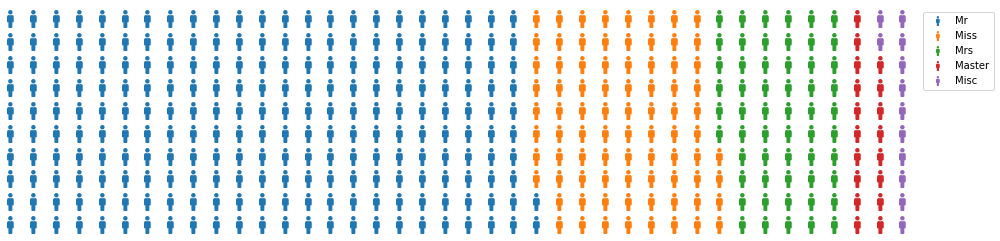

In [51]:
data = {'Mr': 232, 'Miss': 82, 'Mrs': 56, 'Master': 18, 'Misc': 12}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    columns=40,
    values=data, 
    cmap_name="tab10",
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='male', icon_size=18, 
    icon_legend=True,
    figsize=(14, 18)
)

In [52]:
#encoding
Feature1 = [df_train2, df_test2]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Misc": 5}

for dataset in Feature1:
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
    
df_train2['Title'].value_counts()

1    517
2    182
3    125
4     40
5     27
Name: Title, dtype: int64

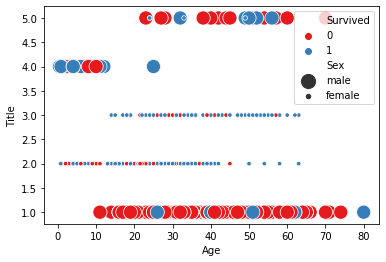

In [53]:
sns.scatterplot(x="Age", y="Title", hue="Survived", size="Sex", palette="Set1",
                     sizes=(20, 200), hue_norm=(0, 7),
                     legend="full", data=df_train2)

In [54]:
pd.qcut(df_train2['Age'], 5).value_counts()

(20.0, 25.0]     258
(30.0, 40.0]     185
(0.419, 20.0]    179
(40.0, 80.0]     150
(25.0, 30.0]     119
Name: Age, dtype: int64

In [55]:
pd.qcut(df_train2['Fare'], 5).value_counts()

(7.854, 10.5]        184
(21.679, 39.688]     180
(-0.001, 7.854]      179
(39.688, 512.329]    176
(10.5, 21.679]       172
Name: Fare, dtype: int64

In [56]:
age_bin = [df_train2, df_test2]
for dataset in age_bin:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 20, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <= 25), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 25) & (dataset['Age'] <= 30), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 40), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 80), 'Age'] = 4

In [57]:
Fare_bin = [df_train2, df_test2]
for dataset in Fare_bin:
    dataset['Fare'] = dataset['Fare'].astype(int)
    dataset.loc[ dataset['Fare'] <= 7.854, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.854) & (dataset['Fare'] <= 10.5), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 10.5) & (dataset['Fare'] <= 21.679), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 21.679) & (dataset['Fare'] <= 39.688), 'Fare'] = 3
    dataset.loc[(dataset['Fare'] > 39.688) & (dataset['Fare'] <= 513), 'Fare'] = 4

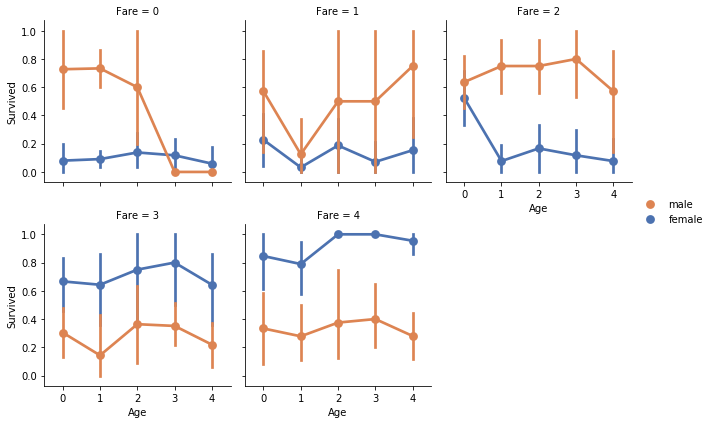

In [58]:
Fig = sns.FacetGrid(df_train2, col = 'Fare', col_wrap=3)
Fig.map(sns.pointplot, 'Age', 'Survived', 'Sex', ci=95.0, palette = 'deep')
Fig.add_legend()

In [59]:
female_mean = df_train2[df_train2.Sex=='female'].groupby(['Sex','Pclass', 'Embarked','Fare'])['Survived'].mean()
female_mean

Sex     Pclass  Embarked  Fare
female  1       C         3       0.750000
                          4       1.000000
                Q         4       1.000000
                S         3       1.000000
                          4       0.954545
        2       C         2       1.000000
                          3       1.000000
                          4       1.000000
                Q         2       1.000000
                S         1       0.875000
                          2       0.880000
                          3       0.937500
                          4       1.000000
        3       C         0       1.000000
                          2       0.529412
                          3       1.000000
                Q         0       0.750000
                          1       0.500000
                          2       0.750000
                          3       0.666667
                S         0       0.550000
                          1       0.235294
                       

In [60]:
male_mean = df_train2[df_train2.Sex=='male'].groupby(['Sex','Pclass', 'Embarked','Fare'])['Survived'].mean()
male_mean

Sex   Pclass  Embarked  Fare
male  1       C         3       0.375000
                        4       0.423077
              Q         4       0.000000
              S         0       0.000000
                        3       0.447368
                        4       0.314286
      2       C         2       0.250000
                        3       0.200000
                        4       0.000000
              Q         2       0.000000
              S         0       0.000000
                        1       0.125000
                        2       0.155556
                        3       0.240000
                        4       0.000000
      3       C         0       0.133333
                        1       0.333333
                        2       0.500000
              Q         0       0.074074
                        1       0.000000
                        2       0.000000
                        3       0.142857
              S         0       0.104839
                        1   

In [61]:
# Creating Deck column from the first letter of the Cabin column, For Missing using M
df_train2['Deck'] = df_train2['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')

df_decks = df_train2.groupby(['Deck', 'Pclass']).count().drop(columns=['Survived', 'Sex', 'Age', 'SibSp',
                                                                      'Parch','Fare', 'Embarked', 'Cabin', 'PassengerId', 
                                                                          'Ticket', 'Title']).rename(columns={'Name': 'Count'}).transpose()
df_decks

Deck     A   B   C   D      E        F     G   M            T
Pclass   1   1   1   1  2   1  2  3  2  3  3   1    2    3  1
Count   15  47  59  29  4  25  4  3  8  5  4  40  168  479  1

In [62]:
deck = df_train2[df_train2['Deck'] == 'T'].index
df_train2.loc[deck, 'Deck'] = 'M'

In [63]:
waf2 = {'A':15, 'B':47, 'C':59, 'D':33, 'E':32, 'F':13, 'G':4, 'M':647, 'T':1}
waf2 = pd.DataFrame(waf2.items(), columns=['Deck', 'Value'])

In [64]:
total_values = sum(waf2['Value'])
category_proportions = [(float(value) / total_values) for value in waf2['Value']]

width = 30 # width of chart
height = 10 # height of chart

total_num_tiles = width * height # total number of tiles

# compute the number of tiles for each catagory
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

# print out number of tiles per category
for i, tiles in enumerate(tiles_per_category):
    print (waf2.Deck.values[i] + ': ' + str(tiles))

A: 5
B: 17
C: 21
D: 12
E: 11
F: 5
G: 1
M: 228
T: 0


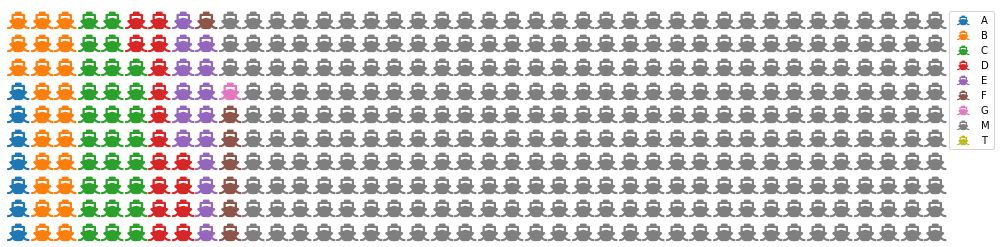

In [65]:
data = {'A':5, 'B':17, 'C':21, 'D':12, 'E':11, 'F':5, 'G':1, 'M':228, 'T':0}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    columns=40,
    values=data, 
    cmap_name="tab10",
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='ship', icon_size=18, 
    icon_legend=True,
    figsize=(14, 18)
)

In [66]:
df_train2['Deck'] = df_train2['Deck'].replace(['A', 'B', 'C'], 'ABC')
df_train2['Deck'] = df_train2['Deck'].replace(['D', 'E'], 'DE')
df_train2['Deck'] = df_train2['Deck'].replace(['F', 'G'], 'FG')

df_train2['Deck'].value_counts()

M      688
ABC    121
DE      65
FG      17
Name: Deck, dtype: int64

In [67]:
df_test2['Deck'] = df_test2['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')

dft_decks = df_test2.groupby(['Deck', 'Pclass']).count().drop(columns=['Sex', 'Age', 'SibSp',
                                                                      'Parch','Fare', 'Embarked', 'Cabin', 'PassengerId', 
                                                                          'Ticket', 'Title']).rename(columns={'Name': 'Count'}).transpose()

In [68]:
df_test2['Deck'] = df_test2['Deck'].replace(['A', 'B', 'C'], 'ABC')
df_test2['Deck'] = df_test2['Deck'].replace(['D', 'E'], 'DE')
df_test2['Deck'] = df_test2['Deck'].replace(['F', 'G'], 'FG')

df_test2['Deck'].value_counts()

M      327
ABC     60
DE      22
FG       9
Name: Deck, dtype: int64

Рассмотрим корреляции признаков

In [69]:
###ckeck corr between difernt class
Target = ['Survived']
corr_cols = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare']

for corr in corr_cols:
    if df_train2[corr].dtype != 'float64' :
        print('Surviving Correlation by:',corr)
        print(df_train2[[corr, Target[0]]].groupby(corr, as_index=False).mean())
        print('-'*20, '\n')#'*20 by -' is to make bottom line of each corr

Surviving Correlation by: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
-------------------- 

Surviving Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
-------------------- 

Surviving Correlation by: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
-------------------- 

Surviving Correlation by: Title
   Title  Survived
0      1  0.156673
1      2  0.697802
2      3  0.792000
3      4  0.575000
4      5  0.444444
-------------------- 

Surviving Correlation by: SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
-------------------- 

Surviving Correlation by: Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
-------------------- 

Surviving Correlation by: 

In [70]:
corr_train = df_train2.drop(['PassengerId'], axis=1).corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
corr_train.rename(columns={"level_0": "Attribute 1", "level_1": "Attribute 2", 0: 'Correlation Coefficient'}, inplace=True)
corr_train.drop(corr_train.iloc[1::2].index, inplace=True)
corr_train1 = corr_train.drop(corr_train[corr_train['Correlation Coefficient'] == 1.0].index)

In [71]:
#Train frame correlations check
corr = corr_train1['Correlation Coefficient'] > 0.3
corr_train1[corr]

,Attribute 1,Attribute 2,Correlation Coefficient
8,Fare,Pclass,0.711312
10,Age,Pclass,0.424713
12,SibSp,Parch,0.414838
14,Title,Survived,0.414088
16,Fare,Parch,0.355411
18,Fare,SibSp,0.353955
20,Title,Fare,0.341456
22,Pclass,Survived,0.338481
24,Fare,Survived,0.320159
26,Title,Parch,0.303608


In [72]:
corr_test = df_test2.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
corr_test.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
corr_test.drop(corr_test.iloc[1::2].index, inplace=True)
corr_test1 = corr_test.drop(corr_test[corr_test['Correlation Coefficient'] == 1.0].index)

In [73]:
# Test frame correlations check
corr1 = corr_test1['Correlation Coefficient'] > 0.3
corr_test1[corr1]

,Feature 1,Feature 2,Correlation Coefficient
8,Pclass,Fare,0.767822
10,Age,Pclass,0.544918
12,Age,Fare,0.353949
14,Fare,SibSp,0.345910
16,Parch,Title,0.326135
18,Parch,Fare,0.322649
20,Parch,SibSp,0.306895


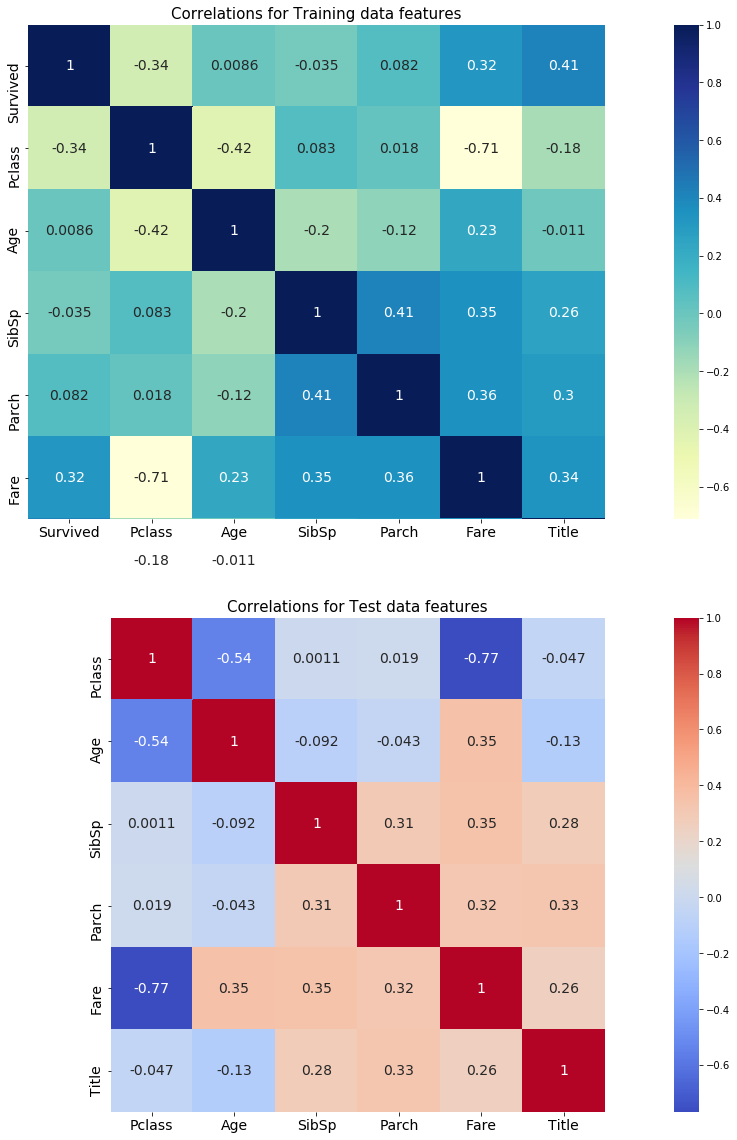

In [74]:
fig, axs = plt.subplots(nrows=2, figsize=(25, 20))

sns.heatmap(df_train2.drop(['PassengerId'], axis=1).corr(), ax=axs[0], annot=True, square=True, cmap="YlGnBu", annot_kws={'size': 14})
sns.heatmap(df_test2.drop(['PassengerId'], axis=1).corr(), ax=axs[1], annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})

for i in range(2):    
    axs[i].tick_params(axis='x', labelsize=14)
    axs[i].tick_params(axis='y', labelsize=14)
    
axs[0].set_title('Correlations for Training data features', size=15)
axs[1].set_title('Correlations for Test data features', size=15)


axs[0].set_ylim(6.0, 0)
axs[1].set_ylim(6.0, 0)
plt.show()

## Обучим несколько моделей, выберем из них наилучшую

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [78]:
df_train2.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test2.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [79]:
df_train2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Deck
0,0,3,male,1,1,0,0,S,1,M
1,1,1,female,3,1,0,4,C,3,ABC
2,1,3,female,2,0,0,0,S,2,M
3,1,1,female,3,1,0,4,S,3,ABC
4,0,3,male,3,0,0,1,S,1,M


In [80]:
df_test2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Deck
0,3,male,3,0,0,0,Q,1.0,M
1,3,female,4,1,0,0,S,3.0,M
2,2,male,4,0,0,1,Q,1.0,M
3,3,male,2,0,0,1,S,1.0,M
4,3,female,1,1,1,2,S,3.0,M


LabelEncoder:
can turn [dog,cat,dog,mouse,cat] into [1,2,1,3,2], but then the imposed ordinality means that the average of dog and mouse is cat. Still there are algorithms like decision trees and random forests that can work with categorical variables just fine and LabelEncoder can be used to store values using less disk space.

One-Hot-Encoding:
has the advantage that the result is binary rather than ordinal and that everything sits in an orthogonal vector space. The disadvantage is that for high cardinality, the feature space can really blow up quickly and you start fighting with the curse of dimensionality. In these cases, I typically employ one-hot-encoding followed by PCA for dimensionality reduction. I find that the judicious combination of one-hot plus PCA can seldom be beat by other encoding schemes. PCA finds the linear overlap, so will naturally tend to group similar features into the same feature.

In [81]:
from sklearn.preprocessing import LabelEncoder

In [82]:
class FeatureEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode
    
    def fit(self,X,y=None):
        return self 

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [83]:
df_tr = df_train2.copy()
df_tr = FeatureEncoder(columns = ['Sex','Embarked', 'Deck']).fit_transform(df_tr)

In [84]:
df_te = df_test2.copy()
df_te = FeatureEncoder(columns = ['Sex','Embarked', 'Deck']).fit_transform(df_te)

In [85]:
df_te.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Deck
0,3,1,3,0,0,0,1,1.0,3
1,3,0,4,1,0,0,2,3.0,3
2,2,1,4,0,0,1,1,1.0,3
3,3,1,2,0,0,1,2,1.0,3
4,3,0,1,1,1,2,2,3.0,3


In [86]:
x_train = df_tr.iloc[:,1:]
y_train = df_tr.iloc[:,:1]

In [87]:
x_test = df_te.copy()

In [88]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer

In [89]:
pr=PolynomialFeatures(degree=3)
z = pr.fit_transform(x_train)
z.shape

(891, 220)

In [90]:
Input=[('scale',PowerTransformer()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LogisticRegression())]
pipe=Pipeline(Input)
pipe.fit(x_train,y_train)
lr_score = round(pipe.score(x_train, y_train) * 100, 2)
print("score:", lr_score, "%")

score: 83.95 %


In [91]:
decision_tree = DecisionTreeClassifier(criterion='entropy', splitter='random') 
decision_tree.fit(x_train, y_train)  
dt_pred = decision_tree.predict(x_test)  
dt_score = round(decision_tree.score(x_train, y_train) * 100, 2)
print("score:", dt_score, "%")

score: 91.69 %


In [92]:
knn = KNeighborsClassifier(n_neighbors = 5) 
knn.fit(x_train, y_train)  
knn_pred = knn.predict(x_test)  
knn_score1 = round(knn.score(x_train, y_train) * 100, 2)
print("score:", knn_score1, "%")

score: 86.08 %


In [93]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(x_train, y_train)  
knn_pred = knn.predict(x_test)  
knn_score = round(knn.score(x_train, y_train) * 100, 2)
print("score:", knn_score, "%")

score: 87.54 %


In [94]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(x_train, y_train)
rf_pred = random_forest.predict(x_test)

rf_score = round(random_forest.score(x_train, y_train) * 100, 2)
print("score:", rf_score, "%")

score: 88.22 %


In [95]:
from sklearn import svm
from sklearn.svm import SVC

model = svm.SVC(C=1, kernel='poly', random_state=0, gamma = 'auto', degree = 5)
model.fit(x_train, y_train)
svm_pred = model.predict(x_test)
svm_score = round(model.score(x_train, y_train) * 100, 2)
print("score:", svm_score, "%")

score: 89.56 %


In [96]:
clf = XGBClassifier()
clf.fit(x_train, y_train, eval_metric='auc', verbose=True)
xgb_pred = clf.predict(x_test)
xgb_score = round(clf.score(x_train, y_train) * 100, 2)
print("score:", xgb_score, "%")

score: 91.13 %


In [97]:
clf1 = XGBClassifier(booster='dart', min_split_loss = 1, max_depth= 7)
clf1.fit(x_train, y_train, eval_metric='auc', verbose=True)
xgb_pred = clf1.predict(x_test)
xgb1_score = round(clf.score(x_train, y_train) * 100, 2)
print("score:", xgb1_score, "%")

score: 91.13 %


In [98]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(x_train, y_train)

percep_pred = perceptron.predict(x_test)

percep_score = round(perceptron.score(x_train, y_train) * 100, 2)
print("score:", percep_score, "%")

score: 77.55 %


In [99]:
gaussian = GaussianNB() 
gaussian.fit(x_train, y_train)  
nb_pred = gaussian.predict(x_test)  
nb_score = round(gaussian.score(x_train, y_train) * 100, 2)
print("score:", nb_score, "%")

score: 77.78 %


In [100]:
#area for Model Score visual
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN_3 ', 'KNN_5', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'XGB Classifier',
              'Decision Tree'],
    'Score': [svm_score, knn_score, knn_score1, lr_score, 
              rf_score, nb_score, percep_score, xgb_score, dt_score]})
result_df = results.sort_values(by='Score', ascending=False)
#result_df = result_df.set_index('Score')
result_df.head(9)

,Model,Score
8,Decision Tree,91.69
7,XGB Classifier,91.13
0,Support Vector Machines,89.56
4,Random Forest,88.22
1,KNN_3,87.54
2,KNN_5,86.08
3,Logistic Regression,83.95
5,Naive Bayes,77.78
6,Perceptron,77.55


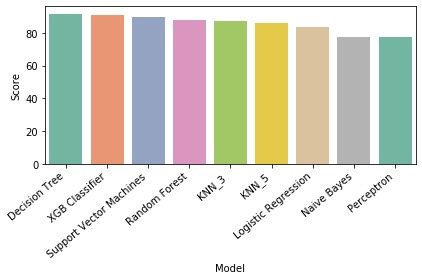

In [101]:
ax = sns.barplot(x="Model", y="Score", data=result_df, palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [102]:
#area for feature importance visual
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(9)

,importance
feature,
Title,0.285
Sex,0.213
Pclass,0.118
Fare,0.091
Age,0.079
Deck,0.071
SibSp,0.065
Embarked,0.040
Parch,0.038


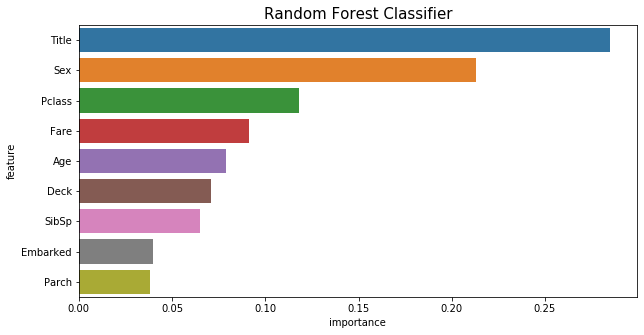

In [103]:
plt.figure(figsize=(10, 5))
sns.barplot(x='importance', y=importances.index, data=importances)

plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.title('Random Forest Classifier', size=15)

plt.show()